<a href="https://colab.research.google.com/github/elliecheshire/Stop_and_Search/blob/main/Stop_Search_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Intro To Code

### Data Processing:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
# mount drive to allow access to files
from google.colab import drive; drive.mount('/content/drive')

# read in .xlsx files into data frames
# these .xlsx files contain all stop and search data from police forces across Endland and Wales
# data is split into 2 files based on years

data07_20 = pd.read_excel('/content/drive/MyDrive/programming_freeform_assessment/stop_search_07_20.xlsx')

data21_23 = pd.read_excel('/content/drive/MyDrive/programming_freeform_assessment/stop_search_21_23.xlsx')

Mounted at /content/drive


In [3]:
data07_20.head()
data21_23.head()

,financial_year,financial_year_quarter,geocode,police_force_area,region,legislation,reason_for_search,outcome,link,self_defined_ethnicity,self_defined_ethnicity_group,officer_defined_ethnicity,combined_ethnicity,sex,age_group,number_of_searches
0,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Nothing found,Pakistani or British Pakistani,Asian or Asian British,NaN,Asian or Asian British,Male,25-29,1
1,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Linked,Black or Black British African,Black or Black British,NaN,Black or Black British,Male,30 or over,1
2,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Linked,Not Stated,Not Stated,Other,Mixed or Other,Male,18-24,1
3,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Not linked,Not Stated,Not Stated,White,White,Male,30 or over,1
4,2020/21,1,E23000036,Avon & Somerset,South West,Section 1 (PACE),Criminal Damage,Arrest,Nothing found,Not Stated,Not Stated,White,White,Male,30 or over,1


In [4]:
# as these 2 datasets are from different years the formatting is inconsistent
# the data therefore needs cleaning so it can be used together

# although both datasets contain mostly the same columns these are named differently so cannot be merged

# change name of Financial Year column
data07_20.rename(columns={'Financial Year': 'financial_year'}, inplace=True)
# change name of police force area column
data07_20.rename(columns = {'Force Name': 'police_force_area'}, inplace=True)
# make all police force names consistent across each dataset (change 'and' to '&')
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('and', '&')
# change back place names containing 'and' (e.g. Midlands and Cleaveland)
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('West Midl&s', 'West Midlands')
data07_20['police_force_area'] = data07_20['police_force_area'].str.replace('Clevel&', 'Cleveland')

# change name of region column
data07_20.rename(columns = {'Region': 'region'}, inplace=True)

# change name of legislation column by removing uppercase
data07_20.rename(columns = {'Legislation': 'legislation'}, inplace=True)

# change name of Reason for Search / Arrest column
data07_20.rename(columns = {'Reason for search / arrest': 'reason_for_search'}, inplace=True)

# change name of Geocode column
data07_20.rename(columns = {'Geocode': 'geocode'}, inplace=True)

# the method for defining ethnic group in the police changed over this period
# the new style used in the 07-20 dataset can be matched to the self_defined_ethnic group column of the 21_23 dataset
# this column will be used for ethnicity in the merged dataset
# change the name of Self_defined_ethnic group to Ethnic group (self-defined - new style)
data21_23.rename(columns = {'self_defined_ethnicity_group': 'Ethnic Group (self-defined - new style)'}, inplace=True)

# change name of Searches column to number of searches
data07_20.rename(columns = {'Searches': 'number_of_searches'}, inplace=True)



In [5]:
# merge data sets into on dataframe
shared_columns = list(set(data07_20.columns) & set(data21_23.columns))

data07_20_subset = data07_20[shared_columns]
data21_23_subset = data21_23[shared_columns]


combined_data = pd.concat([data07_20_subset, data21_23_subset])

# change name of Ethnic group column to allign with other column layouts
combined_data.rename(columns = {'Ethnic Group (self-defined - new style)': 'ethnic_group'}, inplace=True)

combined_data.head()

,legislation,police_force_area,geocode,financial_year,ethnic_group,region,number_of_searches,reason_for_search
0,Section 1 (PACE),Avon & Somerset,E23000036,2006/07,Asian or Asian British,South West,0,Criminal Damage
1,Section 1 (PACE),Avon & Somerset,E23000036,2006/07,Asian or Asian British,South West,0,Criminal Damage
2,Section 1 (PACE),Avon & Somerset,E23000036,2006/07,Asian or Asian British,South West,0,Criminal Damage
3,Section 1 (PACE),Avon & Somerset,E23000036,2006/07,Asian or Asian British,South West,0,Criminal Damage
4,Section 1 (PACE),Avon & Somerset,E23000036,2006/07,Black or Black British,South West,0,Criminal Damage


In [79]:
combined_data['region']=combined_data['region'].str.replace('0','Not Stated')
combined_data['region']=combined_data['region'].fillna('Not Stated')
combined_data['region']=combined_data['region'].str.replace('Eastern','East of England')

### Number of Stops by each Police Force (2007-2023):

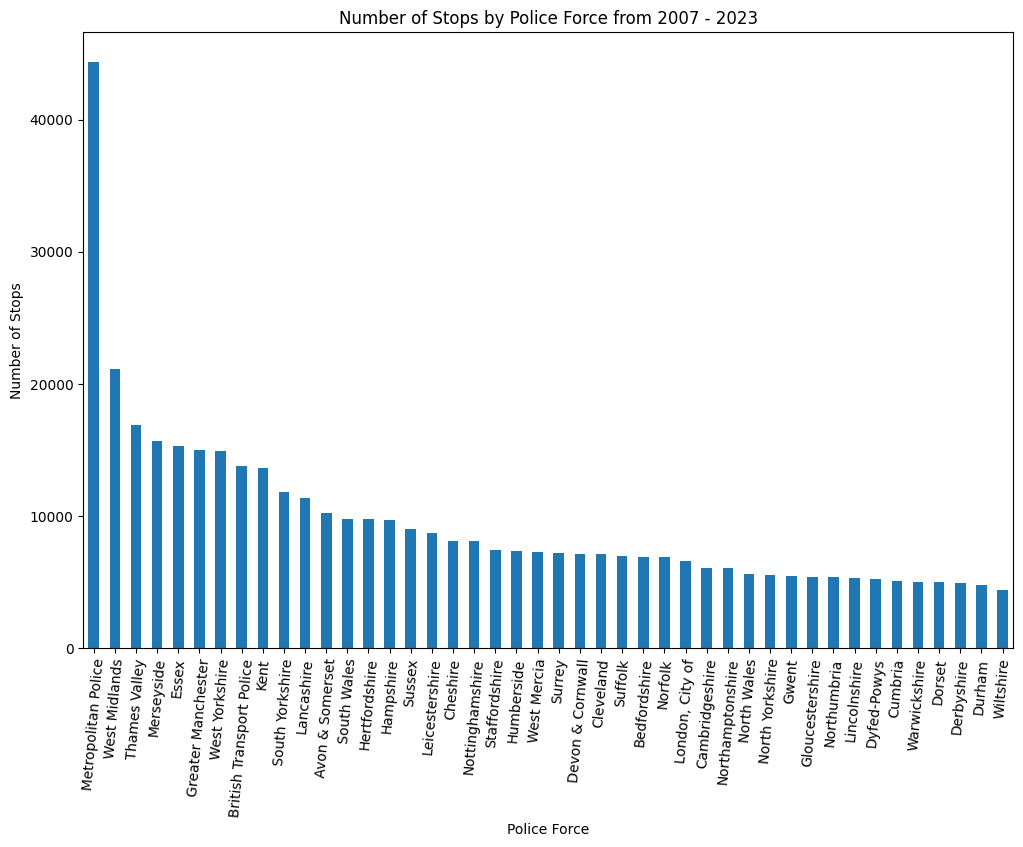

In [63]:
# Number of searches by each force over the 2007 - 2023 period
import matplotlib.pyplot as plt

# plot a bar chart of police force by number of searches
force_name_counts = combined_data['police_force_area'].value_counts()
force_name_counts.plot(kind = 'bar', width=0.5, figsize = (12,8))
plt.title('Number of Stops by Police Force from 2007 - 2023')
plt.xlabel('Police Force')
plt.xticks(rotation = 85)
plt.ylabel('Number of Stops')
plt.show()

### Comparison of Police Stops as a Percentage of the Population covered by the Police Force:

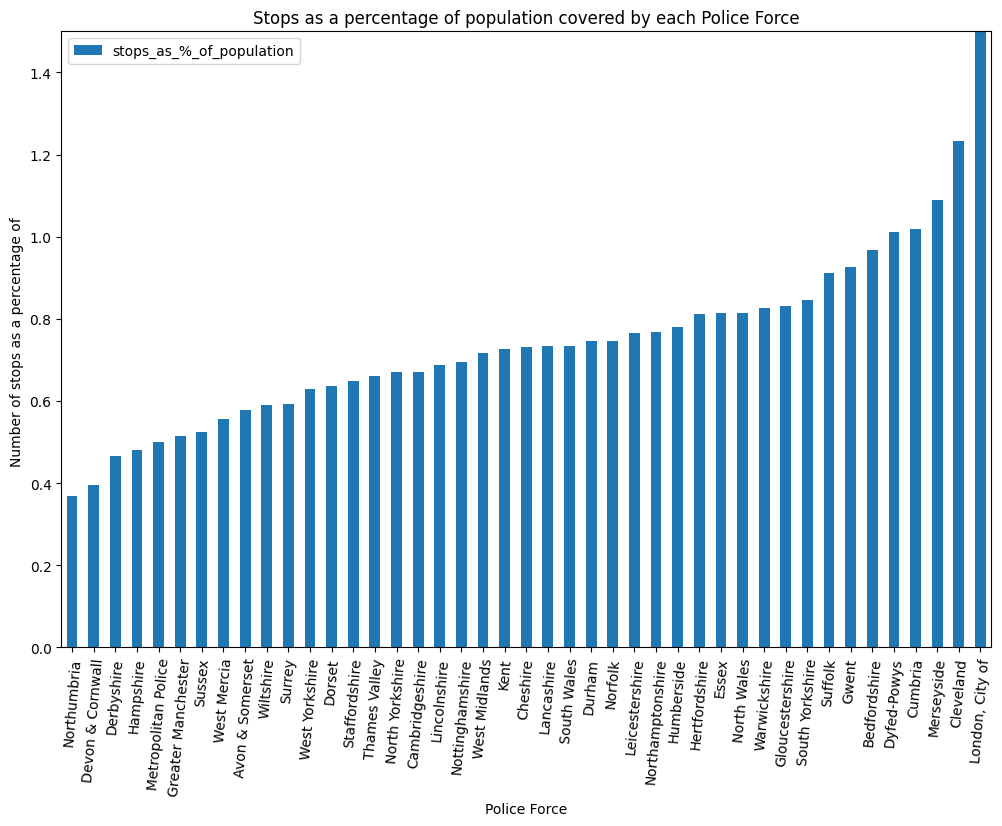

In [64]:
# Stops as a % of the area population

# using population data from mid 2022 to give an estimation of the number of
# stops by each police force in relation to the population they cover

pop_pfa = pd.read_excel('/content/drive/MyDrive/programming_freeform_assessment/population_police_force_area.xlsx')
pop_pfa.head()

# combine dataframe containing number of stops per police force and population using shared 'police_force_area' column
pop_force_name_counts = pd.merge(force_name_counts, pop_pfa, on='police_force_area')

# create a new column calculating number of stops as a percentage of the population
pop_force_name_counts['stops_as_%_of_population'] = pop_force_name_counts['count']/pop_force_name_counts['Population (mid 2022)'] * 100
# make 'London' which is a combination of 'Metrropolitan Police' and 'London, City of'

pop_force_name_counts.sort_values('stops_as_%_of_population', inplace=True)

# plot stops_as_%_of_population cover for each police_force_area
pop_force_name_counts.plot(kind = 'bar',x ='police_force_area', y='stops_as_%_of_population', width = 0.5, figsize = (12,8))
plt.title('Stops as a percentage of population covered by each Police Force')
plt.ylim(0,1.5)
# put bars in descending order

plt.xlabel('Police Force')
plt.xticks(rotation = 85)
plt.ylabel('Number of stops as a percentage of ')
plt.show()


### Stops per Year (2007-2023):

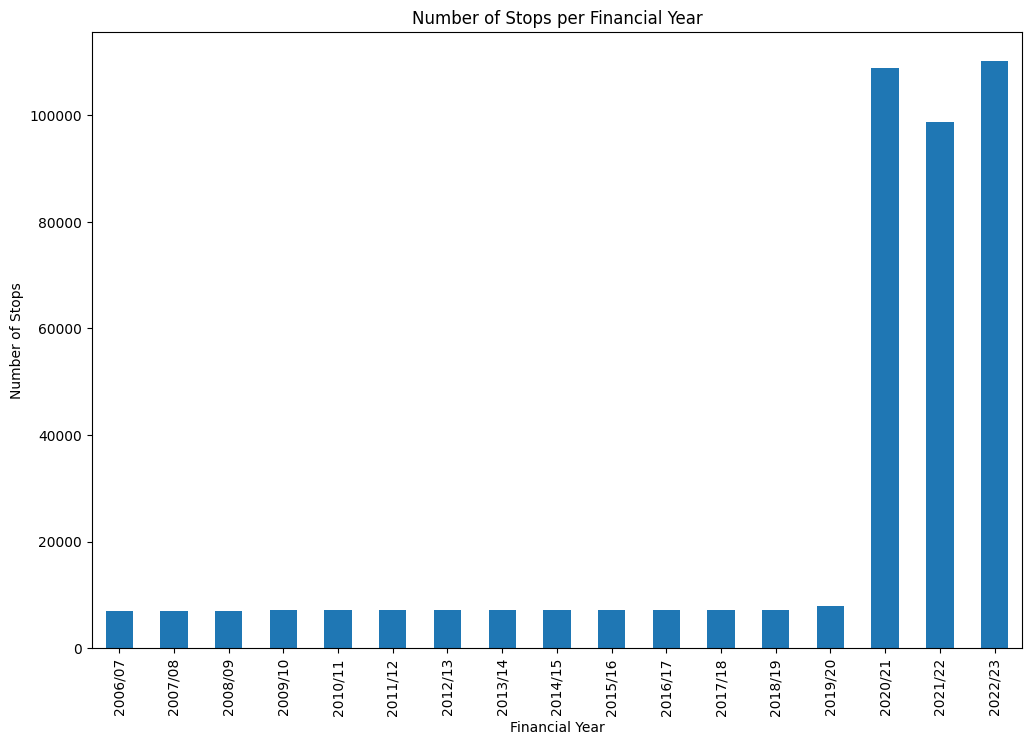

In [65]:
# Stops by Year

stops_per_year = combined_data['financial_year'].value_counts()


stops_per_year.sort_index(inplace=True)
stops_per_year.plot(kind='bar',figsize = (12,8))
plt.title('Number of Stops per Financial Year')
plt.xlabel('Financial Year')
plt.ylabel('Number of Stops')
plt.show()


### Number of Stops by Ethnic Group:


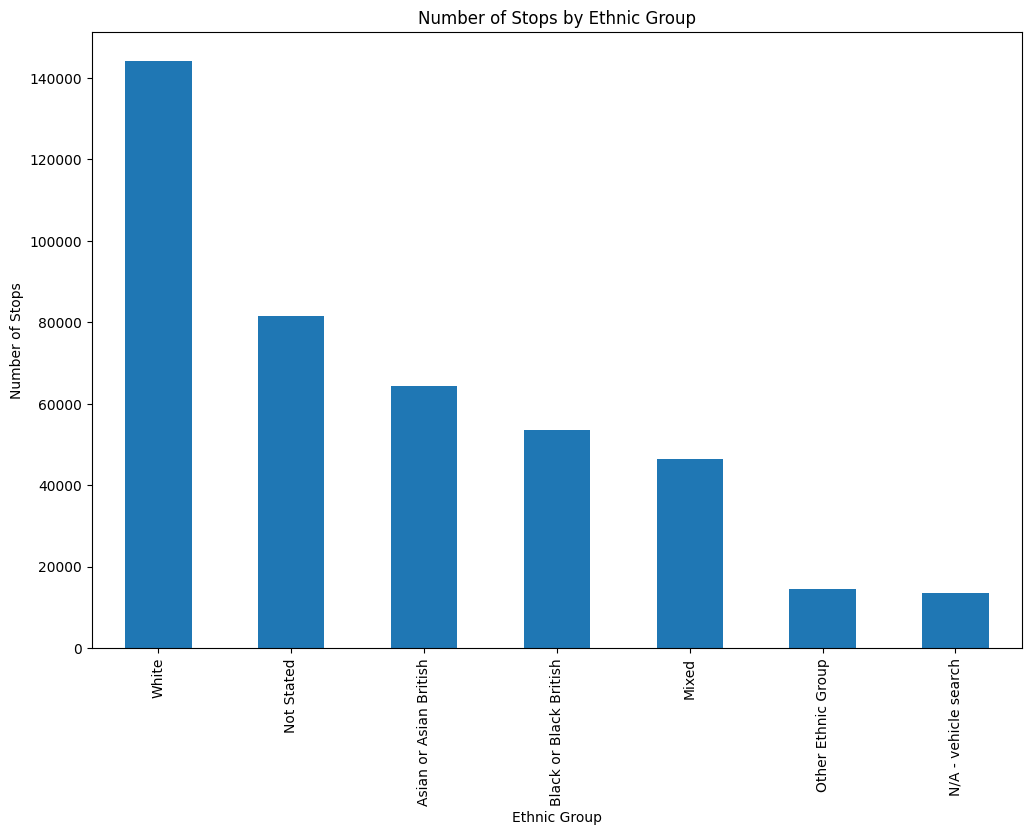

In [66]:
# Ethnicity

ethnic_group_searches = combined_data['ethnic_group'].value_counts()
ethnic_group_searches.plot(kind = 'bar', figsize= (12,8))
plt.title('Number of Stops by Ethnic Group')
plt.xlabel('Ethnic Group')
plt.ylabel('Number of Stops')
plt.show()

### Ethnic Group population of England and Wales compared to percentage of Police stops by Ethnic Group:

In [71]:
# Assess percentage of population of each ethnic group compared to percentage of searches
combined_data['ethnic_group']=combined_data['ethnic_group'].str.replace('Not stated', 'Not Stated')
combined_data['ethnic_group']=combined_data['ethnic_group'].str.replace('Vehicle only', 'N/A - vehicle search')

ethnic_group_searches = pd.DataFrame({'ethnic_group': ethnic_group_searches.index, 'count': ethnic_group_searches.values})
total_stops = ethnic_group_searches['count'].sum()

regional_ethnicity = pd.read_csv("/content/drive/MyDrive/programming_freeform_assessment/areas-of-england-and-wales-by-ethnicity.csv")
regional_ethnicity.rename(columns = {'Ethnicity': 'ethnic_group'}, inplace=True)
regional_ethnicity.rename(columns = {'Geography': 'region'}, inplace = True)
regional_ethnicity.rename(columns = {'%':"population_percentage"}, inplace = True)

ethnicity_mapping = {"Black":"Black or Black British",
                     "Asian": "Asian or Asian British",
                     "White British": "White",
                     "White other": "White",
                     "Other": "Other Ethnic Group"}

regional_ethnicity['ethnic_group'] = regional_ethnicity['ethnic_group'].replace(ethnicity_mapping)
regional_ethnicity = regional_ethnicity.groupby(['region','ethnic_group'], as_index=False).agg({'population_percentage':'sum'})

ethnicity_population = regional_ethnicity.groupby('ethnic_group')['population_percentage'].sum()

total_percentage = ethnicity_population.sum()
ethnicity_population = (ethnicity_population / total_percentage) * 100

# COMPARE WITH SEARCH PERCENTAGES
ethnic_group_searches['search_percentage'] = (ethnic_group_searches['count'] / total_stops) * 100

# merge data frames
ethnic_group_searches = pd.merge(ethnic_group_searches, ethnicity_population, on = 'ethnic_group', how = 'left')

#figure

plt.figure(figsize = (12,8))
ax = plt.axes()
barwidth = 0.5

ax.bar(np.arange(len(ethnic_group_searches['ethnic_group'])) - barwidth/2, ethnic_group_searches['population_percentage'],width = barwidth, label = 'Percentage of Population', color = 'blue')
ax.bar(np.arange(len(ethnic_group_searches['ethnic_group']))+ barwidth/2, ethnic_group_searches['search_percentage'], width = barwidth, label = 'Percentage of Stops', color = 'red')
ax.set_xlabel('Ethnic Group')
ax.set_ylabel('Percentage (%)')
ax.set_xticks(np.arange(len(ethnic_group_searches['ethnic_group'])))
ax.set_xticklabels(ethnic_group_searches['ethnic_group'], rotation=45)

plt.title('Percentage of Population vs Percentage of Stops by Ethnic Group')
plt.legend()
plt.show()

ValueError: Per-column arrays must each be 1-dimensional

### Regional Population by Ethnic Group

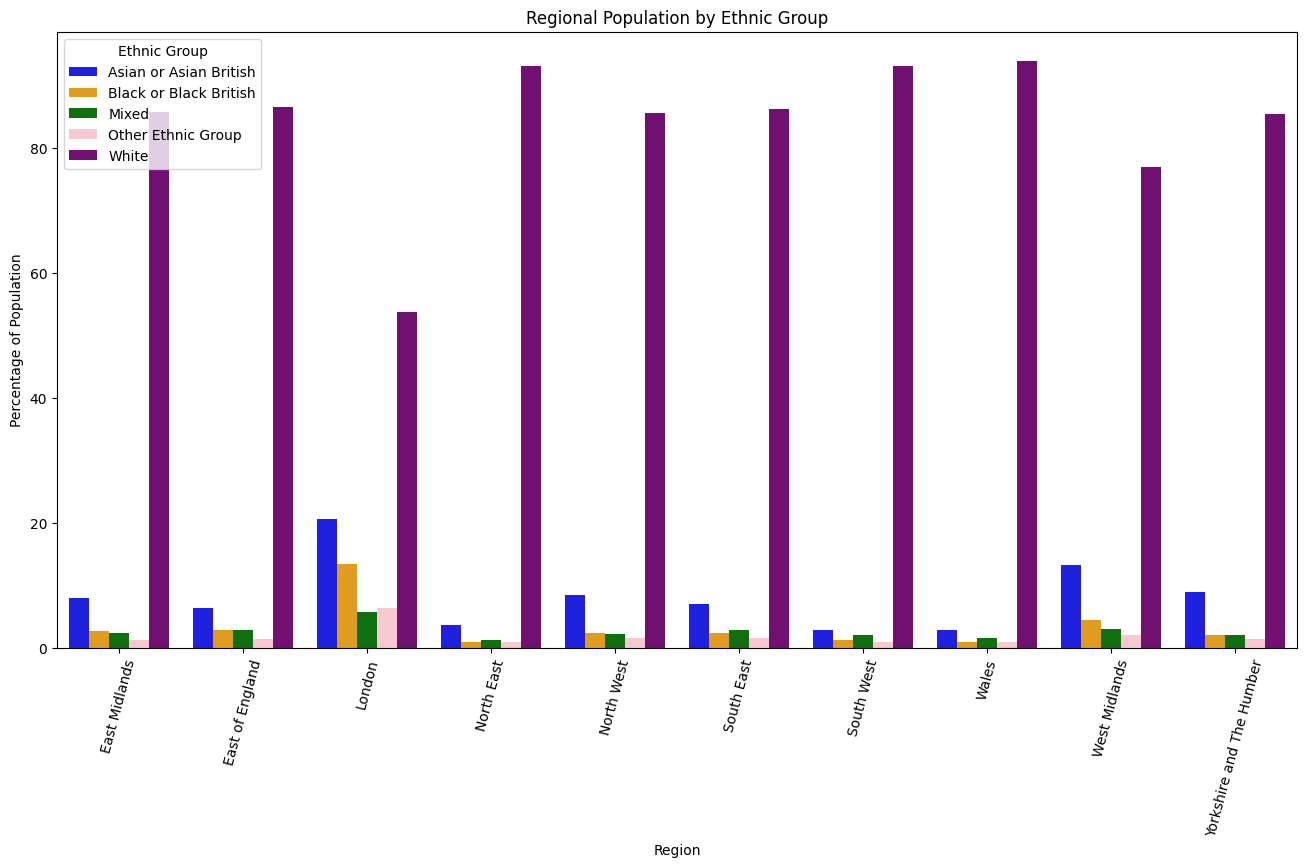

In [68]:
custom_palette = {'White':'Purple',
                  'Asian or Asian British':'Blue',
                  'Black or Black British':'Orange',
                  'Mixed':'Green',
                  'Other Ethnic Group':'Pink',
                  }

import seaborn as sns
plt.figure(figsize=(16,8))
sns.barplot(
    data = regional_ethnicity,
    x='region',
    y='population_percentage',
    hue='ethnic_group',
    palette=custom_palette
)

plt.title('Regional Population by Ethnic Group')
plt.xlabel('Region')
plt.ylabel('Percentage of Population')
plt.legend(title='Ethnic Group')
plt.xticks(rotation=75)
plt.show()

Ethnic group population and Search population by area

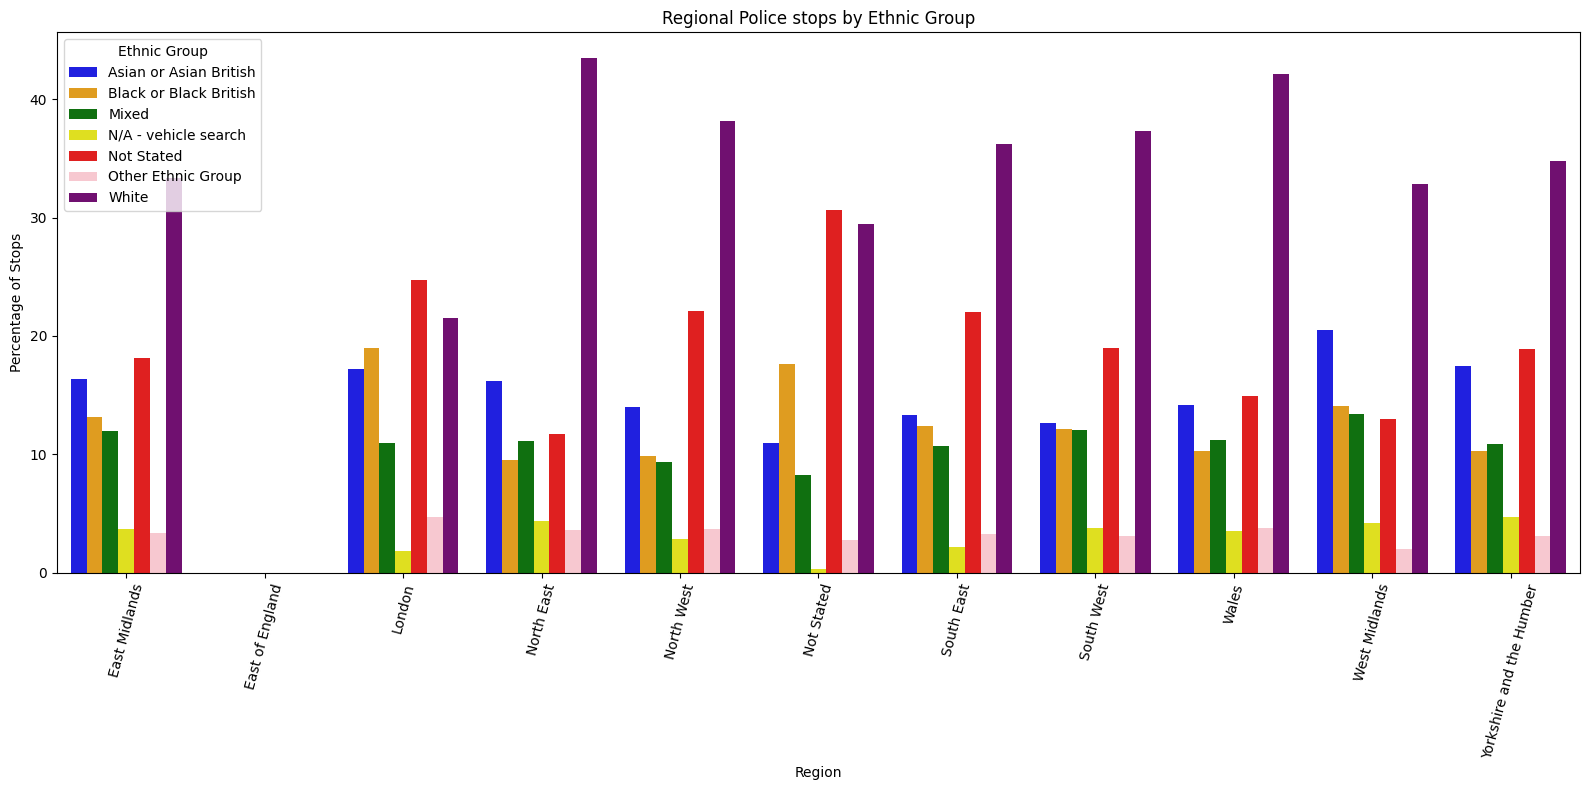

In [73]:
regional_ethnicity
ethnic_group_searches

custom_palette = {'White':'Purple',
                  'Asian or Asian British':'Blue',
                  'Black or Black British':'Orange',
                  'Mixed':'Green',
                  'Other Ethnic Group':'Pink',
                  'N/A - vehicle search':'Yellow',
                  'Not Stated':'Red'
                  }

region_summary = combined_data.groupby(['region','ethnic_group']).size().reset_index(name='Stops')

region_total_stops['Total Stops in Region'] = region_summary.groupby('region')['Stops'].sum()
region_total_stops

region_summary = pd.merge(region_summary, region_total_stops, on='region', how='left')
region_summary['Percentage of Stops'] = (region_summary['Stops'] / region_summary['Total Stops in Region']) * 100
region_summary


plt.figure(figsize=(16,8))
sns.barplot(
    data = region_summary,
    x='region',
    y='Percentage of Stops',
    hue='ethnic_group',
    palette=custom_palette
)
plt.title('Regional Police stops by Ethnic Group')
plt.xlabel('Region')
plt.ylabel('Percentage of Stops')
plt.legend(title='Ethnic Group')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()



In [80]:
combined_data['region'].unique()

array(['South West', 'East of England', 'Not Stated', 'North West',
       'North East', 'East Midlands', 'Wales', 'South East',
       'Yorkshire and the Humber', 'London', 'West Midlands'],
      dtype=object)

Legislation used for search by Ethnic group



In [25]:
# plot legislation and ethnic group

legislation_summary = combined_data.groupby(['legislation', 'ethnic_group']).size().reset_index(name='count')
legislation_summary['percentage']=(legislation_summary['count']/legislation_summary.groupby('legislation')['count'].transform('sum')) *100
legislation_summary

px.bar(legislation_summary, x='legislation', y='percentage', color='ethnic_group',barmode='stack', labels={'co'}


Section 1 (PACE): provides police with a power to stop and search a person or vehicle where they have reasonable grounds to suspect they will find prohibited items.

Section 44/47a (TACT): provides police with the power to stop and search  when they have reasonable suspicion that an act of terrorism will take place.

Section 60 (CJPOA): provides police with the power to stop and search individuals for weapons or dangerous instruments, where and authorisation has been granted. (no need for suspicion)